In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [256]:
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [257]:
#lets describe the data
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [258]:



#infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [259]:
#any null values 
#not neccessary in above information we can see
df.isnull().values.any()

False

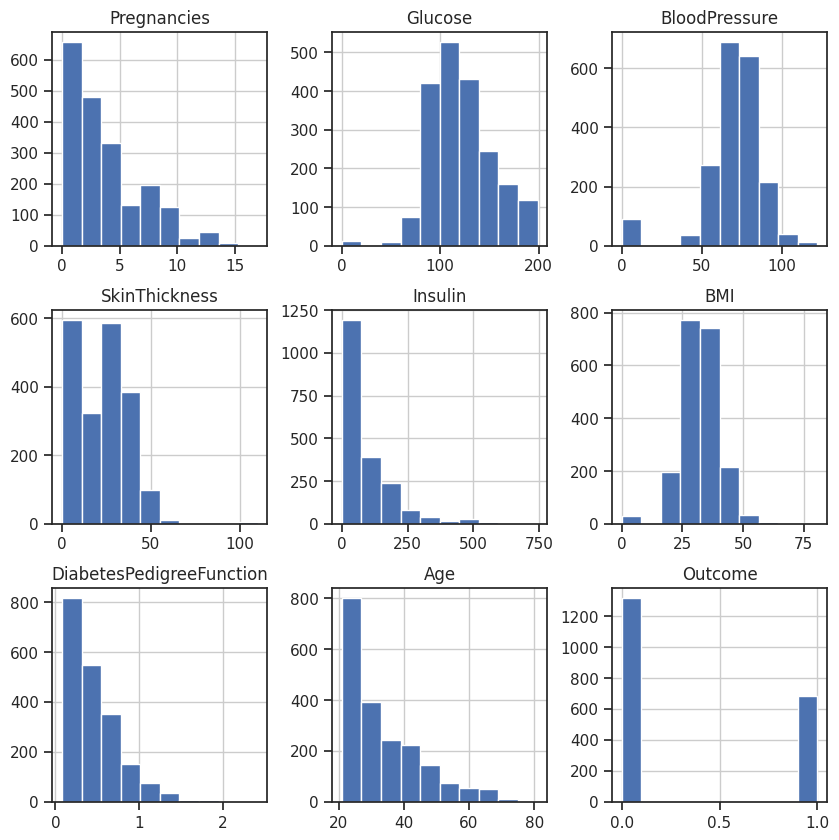

In [260]:

#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

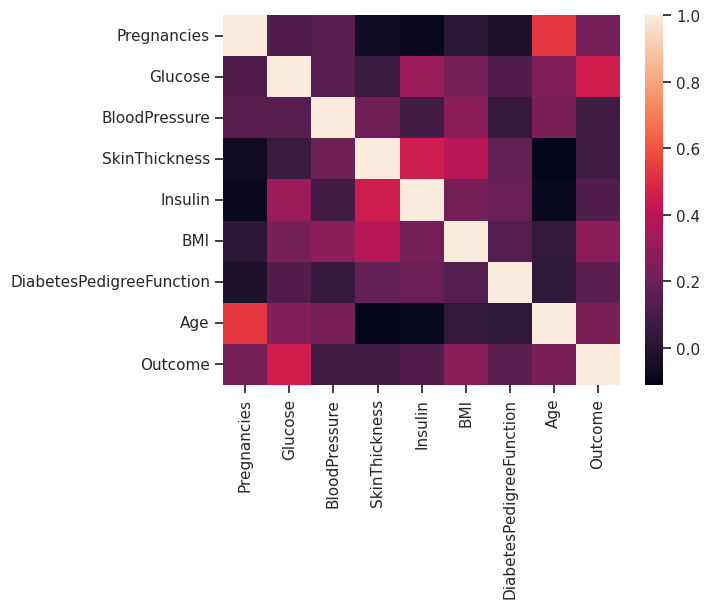

In [261]:
#correlation

sns.heatmap(df.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other


<Axes: xlabel='count', ylabel='Outcome'>

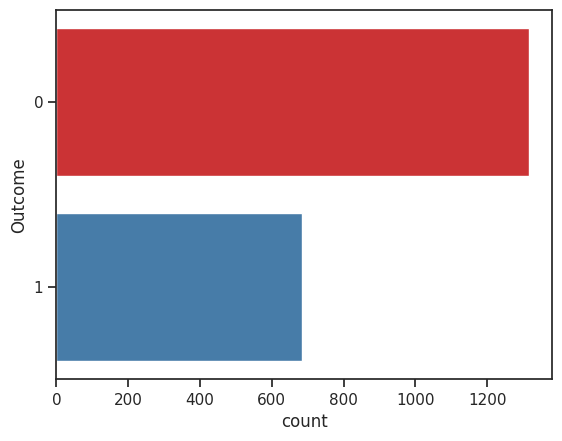

In [262]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

In [263]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [264]:
# The missing values will be filled with the median values of each variable
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [265]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

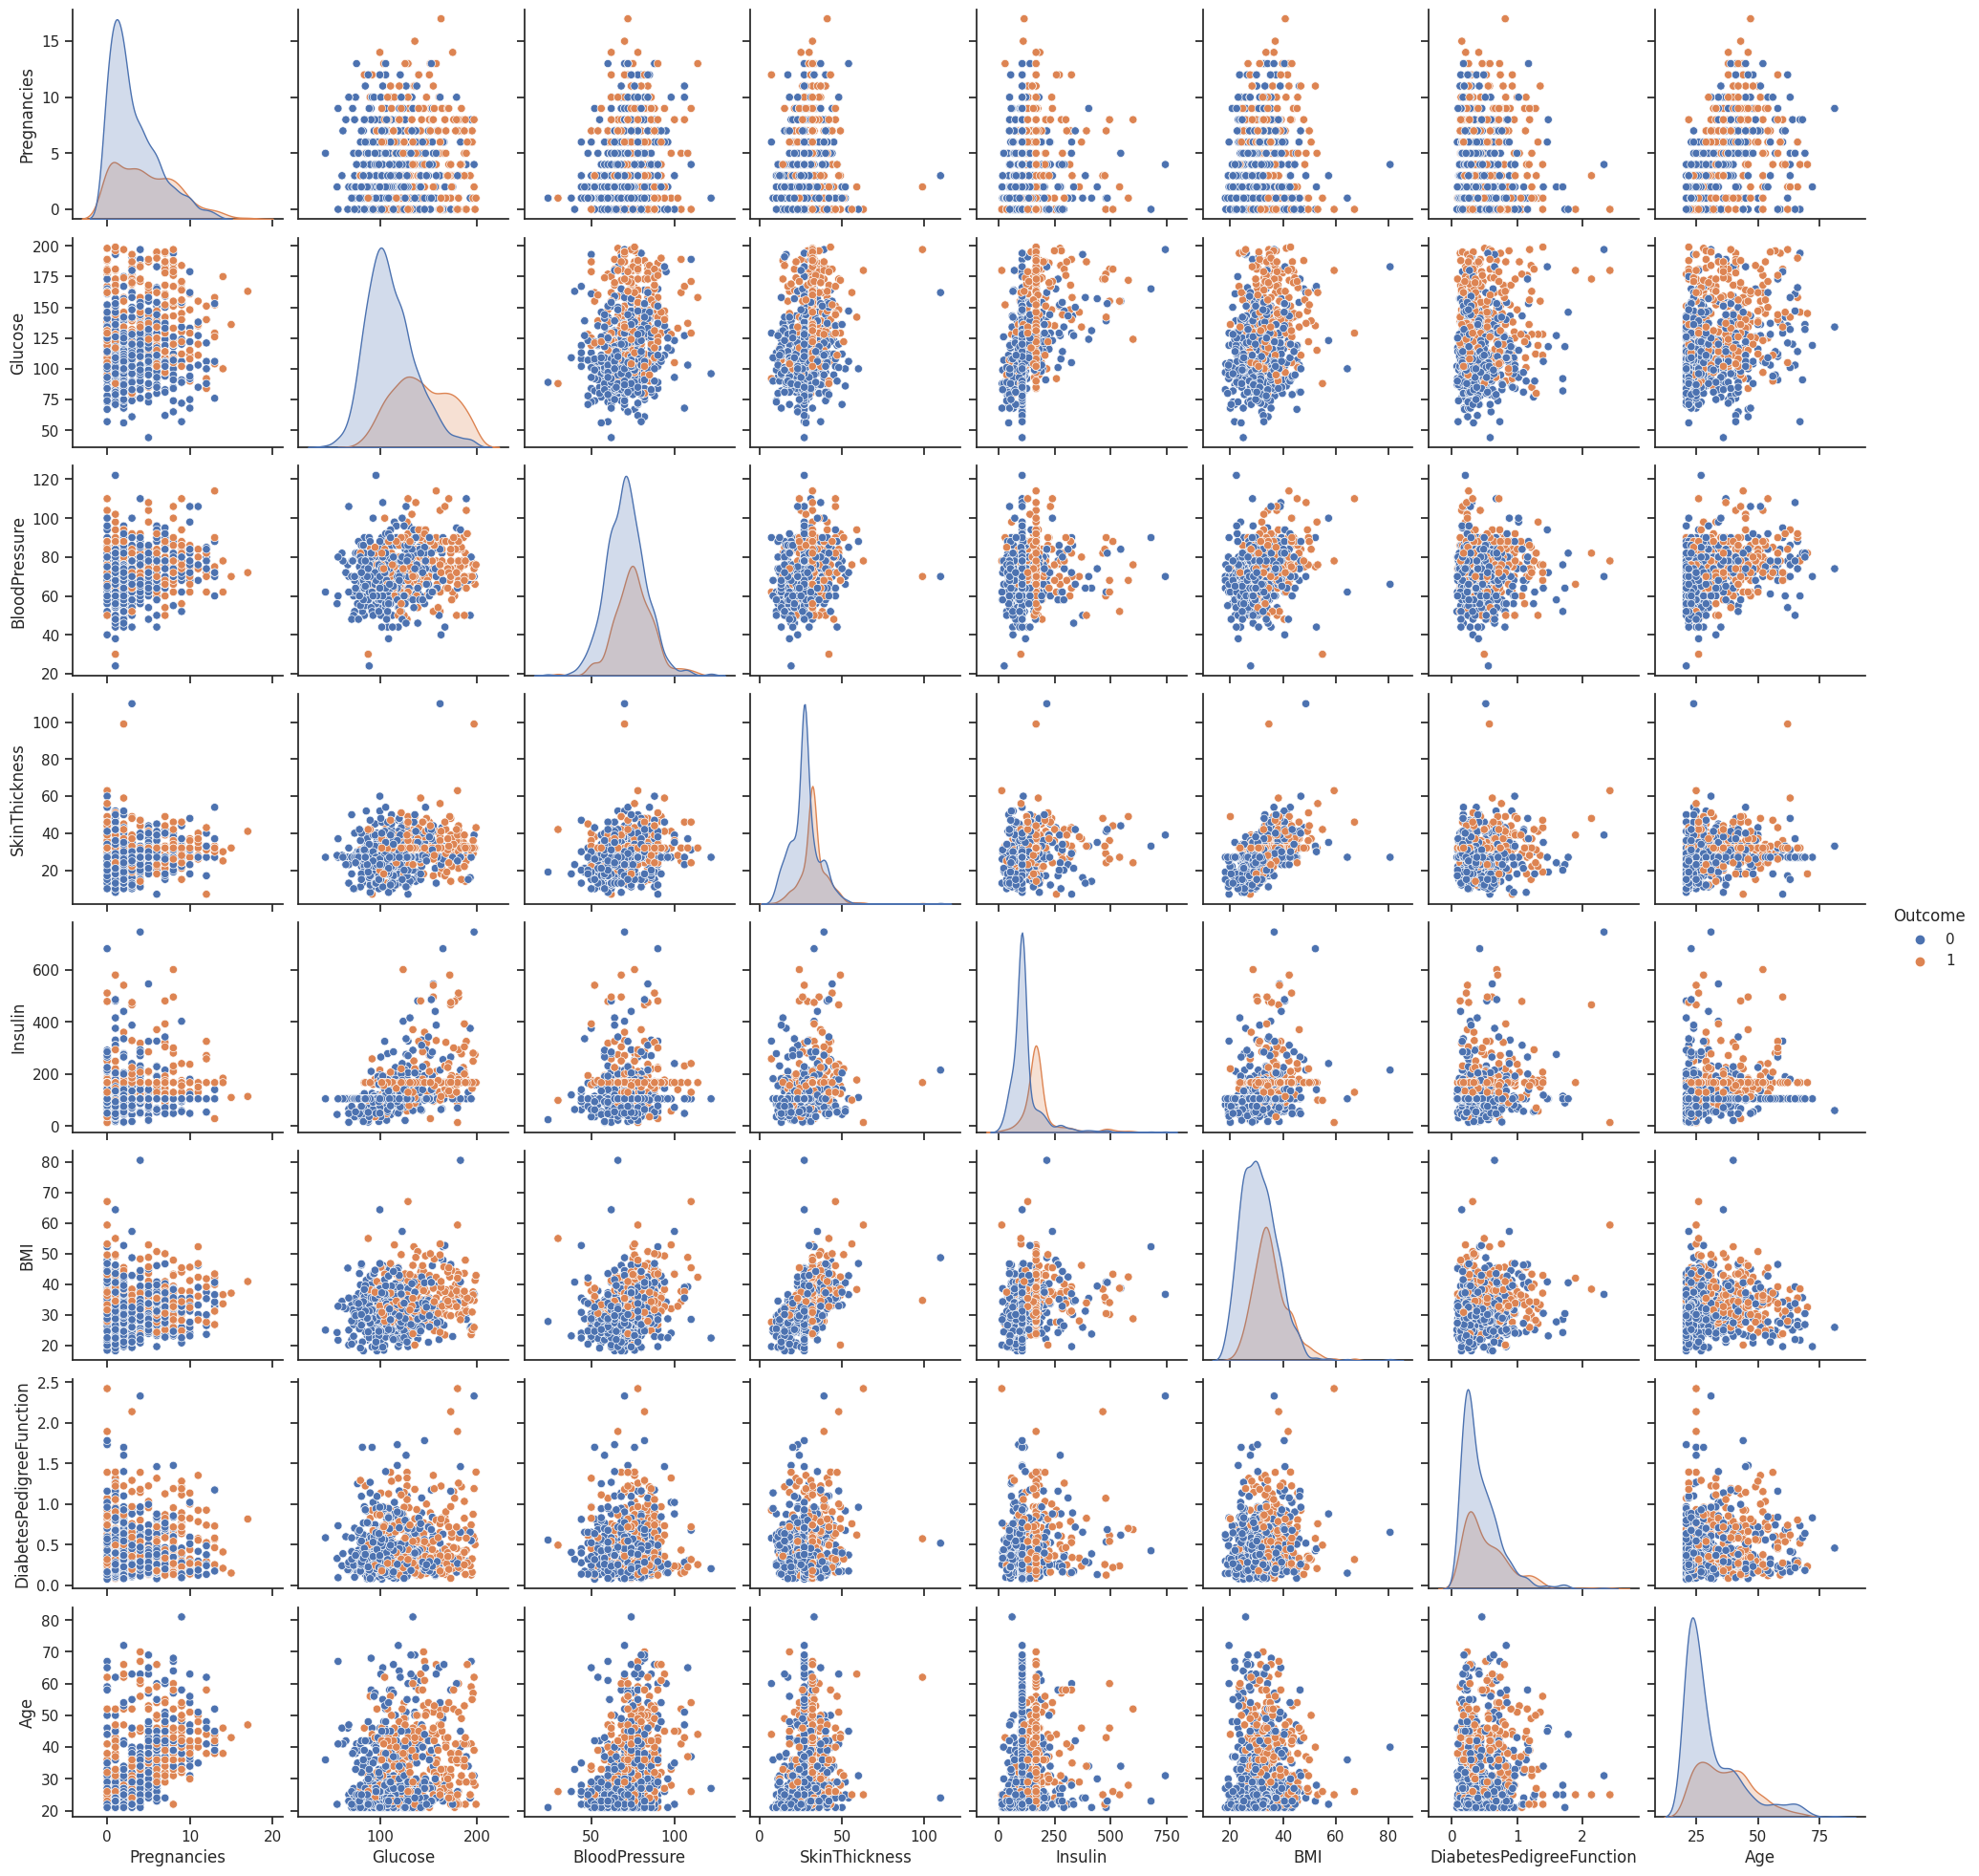

In [266]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

<Axes: >

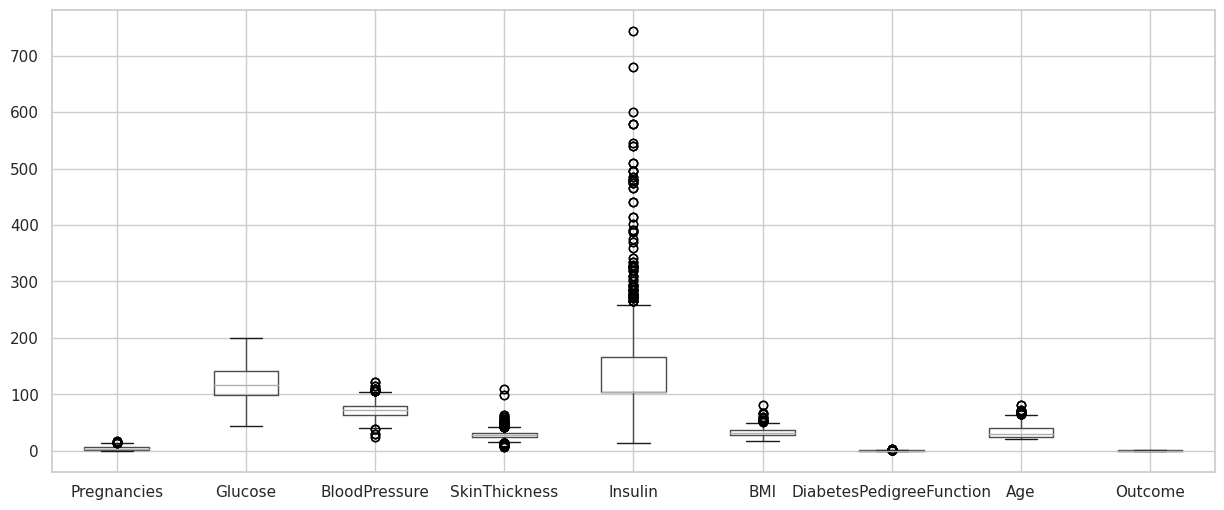

In [267]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

In [268]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))


---Q1--- 
 Pregnancies                   1.000
Glucose                      99.000
BloodPressure                64.000
SkinThickness                25.000
Insulin                     105.000
BMI                          27.600
DiabetesPedigreeFunction      0.244
Age                          24.000
Outcome                       0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     167.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                  5.00
Glucose                     42.00
BloodPressure               16.00
SkinThickness                7.00
Insulin                     62.00
BMI                          9.20
DiabetesPedigreeFunction     0.38
Age                      

In [269]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape


((2000, 9), (1503, 9))

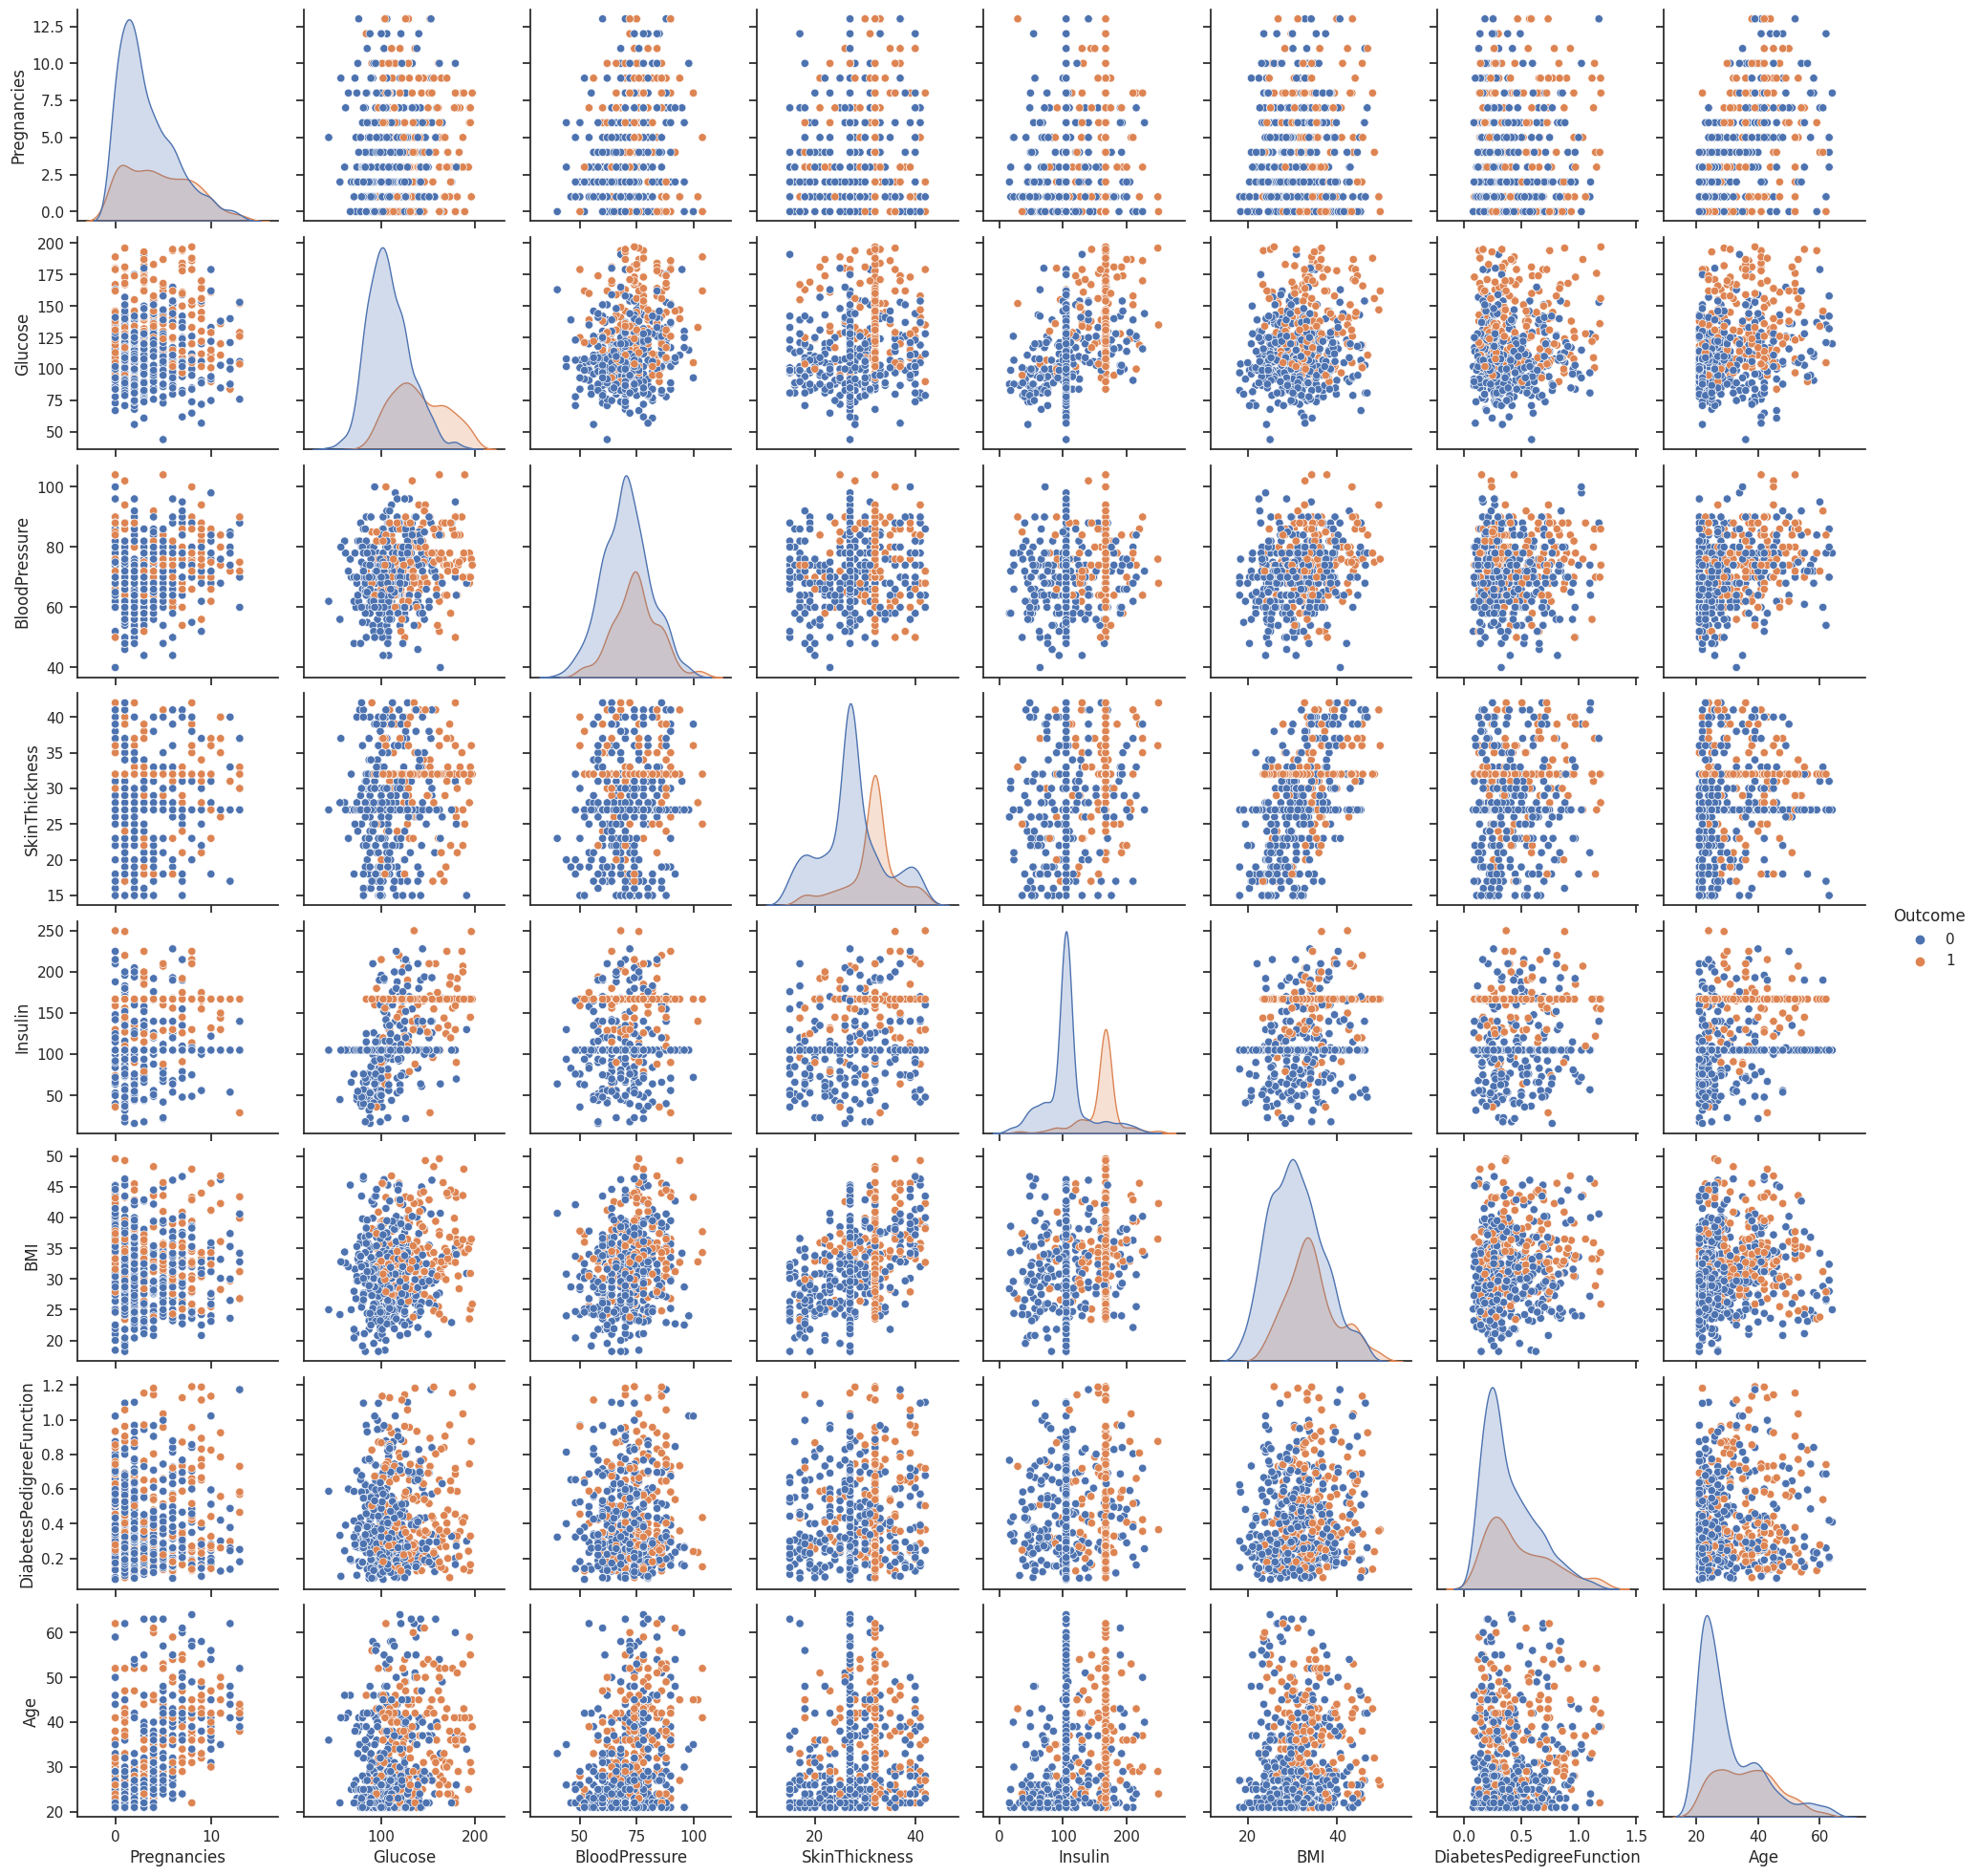

In [270]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [271]:
df_out

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2    138.0           62.0           35.0    167.0  33.6   
1               0     84.0           82.0           31.0    125.0  38.2   
2               0    145.0           75.0           32.0    167.0  44.2   
3               0    135.0           68.0           42.0    250.0  42.3   
6               4     99.0           72.0           17.0    105.0  25.6   
...           ...      ...            ...            ...      ...   ...   
1994            1     79.0           60.0           42.0     48.0  43.5   
1995            2     75.0           64.0           24.0     55.0  29.7   
1996            8    179.0           72.0           42.0    130.0  32.7   
1997            6     85.0           78.0           27.0    105.0  31.2   
1999            2     81.0           72.0           15.0     76.0  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1                        0.233   23        0  
2                        0.630   31        1  
3                        0.365   24        1  
6                        0.294   28        0  
...                        ...  ...      ...  
1994                     0.678   23        0  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1999                     0.547   25        0  

[1503 rows x 9 columns]

In [272]:
df_out.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1503.000000  1503.000000    1503.000000    1503.000000  1503.000000   
mean      3.726547   118.355289      71.869594      28.621424   122.385895   
std       3.184371    28.831346      10.512134       6.236121    42.135143   
min       0.000000    44.000000      40.000000      15.000000    16.000000   
25%       1.000000    98.000000      64.000000      26.000000   105.000000   
50%       3.000000   114.000000      72.000000      28.000000   105.000000   
75%       6.000000   136.000000      78.000000      32.000000   167.000000   
max      13.000000   197.000000     104.000000      42.000000   250.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  1503.000000               1503.000000  1503.000000  1503.000000  
mean     31.936793                  0.421727    32.290752     0.322023  
std       6.113711                  0.251064    10.412847     0.467407  
min      18.200000                  0.078000    21.000000     0.000000  
25%      27.500000                  0.236000    24.000000     0.000000  
50%      31.600000                  0.343000    29.000000     0.000000  
75%      35.700000                  0.569000    39.000000     1.000000  
max      49.600000                  1.191000    64.000000     1.000000

In [273]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

In [287]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [288]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1202, 8), (301, 8), (1202,), (301,))

In [289]:
#Lets build the model

#Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)




print("\nAccuracy {0}".format(ac))
print(confusion_matrix(test_y,y_pred))


#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8571428571428571
[[178  17]
 [ 26  80]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [290]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)



print("\nAccuracy {0} ".format(ac))

print(confusion_matrix(test_y,y_pred))

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.9435215946843853 
[[185  10]
 [  7  99]]


In [291]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rand_clf=RandomForestClassifier()
rand_clf.fit(train_X,train_y)

y_pred=rand_clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)




print("\nAccuracy {0} ".format(ac))


print(confusion_matrix(test_y,y_pred))


#display predicted values uncomment below line
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.9933554817275747 
[[193   2]
 [  0 106]]


Actual  Predicted
1432       0          0
19         0          0
742        0          0
954        1          1
1397       0          0

In [279]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)




print("\nAccuracy {0} ".format(ac))

print(confusion_matrix(test_y,y_pred))
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head())


Accuracy 0.8770764119601329 
[[180  20]
 [ 17  84]]


In [280]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)


print("\nAccuracy {0} ".format(ac))

print(confusion_matrix(test_y,y_pred))

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.9900332225913622 
[[200   0]
 [  3  98]]


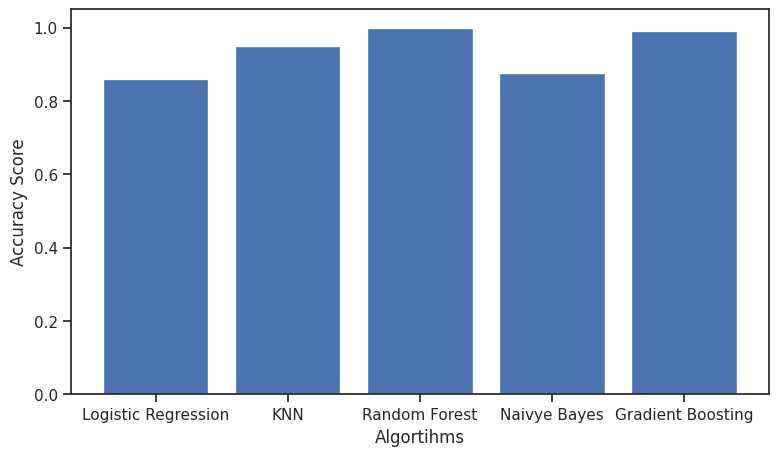

In [281]:
#lets plot the bar graph

ax=plt.figure(figsize=(9,5))
plt.bar(['Logistic Regression','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()


In [282]:
import pickle
model =rand_clf
pickle.dump(model, open("diabetes.pkl",'wb'))

In [283]:
load_model=pickle.load(open('diabetes.pkl','rb'))

In [284]:
input_data = (2,138, 62, 35, 167, 33.6, 0.127,47)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = load_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [285]:
input_data = (0, 84, 82, 31, 125, 38.2, 0.233,23)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = load_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
